# PURPOSE OF THE DATA WRANGLING MASTER TUTORIAL WITH R AND PYTHON
The purpose of this Master Tutorial is to teach a bit of data wrangling on a typical social science data set derived from a survey. The purpose is NOT to teach you R or Python. That would be much better handled in a dedicated class on Coursera, Udemy, edX, etc (feel free to email me at robstilson@gmail.com if you would like recommendations). This tutorial jumps in at around an advanced beginner to intermediate level. Therefore the purpose is more around teaching data wrangling while laying the ground work for a Rosetta Stone type reference between R and Python.

Below we will import the needed packages. This is similar to the library() command in R. Notice the "as" after the import of the package. This creates an alias so instead of typing pandas.read_csv to import a .csv we can just type pd.read_csv. Unlike R, in Python you are essentially calling the commands from the package everytime you ran them. This can help to alleviate the confusion of like named functions. For instance in R if you run the describe() function, it will run the describe() function from the last package you installed. For a social scientist, this can become confusing when you have both the Hmisc and psych package loaded simultaneaously. In R you can get around this by using ::, so psych::describe() and Hmisc::describe(). This is never an issue in Python.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import re

### Import the data

In [86]:
# Import the data
data = pd.read_csv('C:\\Users\\Rob\\Desktop\\Python Programming Course\\SIOP Data Wrangling Master Tutorial Data Set.csv', encoding = 'latin1')

### Explore the data

Below we are going to call the head of the data. This is essentially the same as head() in R. Notice however that instead of head(data) we are going to use data.head() with a period seperating the data frame from the function. This is why I tell those who I teach R to NEVER USE PERIODS in your naming conventions because if/when you also learn Python this can become very confusing.

Also notice that we are grabbing the first 5 rows of the data, but they are indexed from 0:4. Python is a programming language that uses 0 indexing unlike R which uses 1 indexing. For more on this go [here](https://python-history.blogspot.com/2013/10/why-python-uses-0-based-indexing.html). Keep this in mind as it can also be very confusing when you are coming from an index 1 language.

In [87]:
data.head()

,Number,First Name,Last Name,Email Address,Department,Division,Completed On,Respondent IP,Employee Commitment and Satisfaction:ECS_Q1,Employee Commitment and Satisfaction:ECS_Q2,...,Company Image:CI_Q3,Company Image:CI_Q4,Strategy:STRAT_Q1,Strategy:STRAT_Q2,Strategy:STRAT_Q3,"On a scale of zero to ten, how likely is it that you would recommend Company to friends as a great place to work?",What 2-3 things do you value most about working at Company?,What 2-3 things should Company begin to do?,What 2-3 things should Company stop doing?,Please provide suggestions for ongoing improvement to the performance feedback process.
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,100.000.000.000,Agree,Somewhat Agree,...,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,9,I enjoy my team and the people with whom I wor...,Make sure to continue to appreciate those who ...,Too many meetings and not enough time to work....,I think the process is excellent and run extre...
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,100.000.000.001,Somewhat Agree,Somewhat Disagree,...,Somewhat Agree,Somewhat Agree,Agree,Somewhat Disagree,Agree,7,"Opportunities for continuing education, opport...",Reconsider how we define and provide 'benefits...,Reconsider our travel needs and budgets - it ...,I have no significant issues with our performa...
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,100.000.000.002,Somewhat Agree,Somewhat Disagree,...,Disagree,Somewhat Agree,Somewhat Agree,Somewhat Agree,Agree,7,The ability to work remotely from home. Great ...,Continue the monthly bonus program and discont...,Stop the ticketing program. \r\n\r\nStop hirin...,Have our goals set by management so we know wh...
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,100.000.000.003,Agree,Agree,...,Somewhat Agree,Agree,Agree,Agree,Agree,9,Independence\r\nTeam Work,NetSuite upgrades for a more efficient workflo...,Employing bad apples\r\nMaking development exc...,NaN
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,100.000.000.004,Agree,Somewhat Disagree,...,Somewhat Agree,Agree,Somewhat Agree,Somewhat Agree,Agree,5,My paycheck\r\n401K\r\nLocation,1) Better training with enough time to underst...,1)Remove SDC Weekly Activities from SDC's resp...,Nothing at this time.


df.info() is similar to str() in R

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 60 columns):
Number                                                                                                               245 non-null int64
First Name                                                                                                           245 non-null object
Last Name                                                                                                            245 non-null object
Email Address                                                                                                        0 non-null float64
Department                                                                                                           245 non-null object
Division                                                                                                             245 non-null object
Completed On                                                               

df.columns is similar to colnames() in R

In [89]:
data.columns

Index(['Number', 'First Name', 'Last Name', 'Email Address', 'Department',
       'Division', 'Completed On', 'Respondent IP',
       'Employee Commitment and Satisfaction:ECS_Q1',
       'Employee Commitment and Satisfaction:ECS_Q2',
       'Employee Commitment and Satisfaction:ECS_Q3',
       'Employee Commitment and Satisfaction:ECS_Q4',
       'Employee Commitment and Satisfaction:ECS_Q5',
       'Employee Commitment and Satisfaction:ECS_Q6',
       'Workplace Environment and Culture:WEC_Q1',
       'Workplace Environment and Culture:WEC_Q2',
       'Workplace Environment and Culture:WEC_Q3',
       'Workplace Environment and Culture:WEC_Q4',
       'Workplace Environment and Culture:WEC_Q5',
       'Compensation & Benefits:CB_Q1', 'Compensation & Benefits:CB_Q2',
       'Compensation & Benefits:CB_Q3', 'Compensation & Benefits:CB_Q4',
       'Performance Management:PM_Q1', 'Performance Management:PM_Q2',
       'Performance Management:PM_Q3', 'Performance Management:PM_Q4',
      

### Cleaning the string data

Notice the use of [\uXXXX] designations below. This is for unicode text and is particularly useful for some of the nastier text you may import and need to clean (em-dash, I'm looking at you). The site (What Unicode character is this?) [http://www.babelstone.co.uk/Unicode/whatisit.html?] is very helpful in helping to identify what characters you are trying to remove from your text. Some of the usual suspects are found below and you may want to build some code in at the beginning of your documents to simply handle this before it becomes a problem with variable or column names.
Em-dash-u2014
Curly quotes left-u201C
Curly quotes right-u201D

#### Regular Expressions (regex)

It is also helpful to know about Regular Expressions (regex) when dealing with text data. If you are like me, you may be asking yourself, ["What are Regular Expressions?"](https://www.regular-expressions.info/) I had never heard of them until a few years after graduate school and as the linked site so eloquently puts it, regex is "a special text string for describing a search pattern. You can think of regular expressions as wildcards on steroids." Regex is very powerful when trying to maniuplate text and I highly recommend learning more about it, especially if you are interested in Data Wrangling.

In [90]:
#Removing " " in variable names and replacing with "_"
#From: https://salayhin.wordpress.com/2016/07/09/rename-columns-in-pandas-data-frame/
data.columns=data.columns.str.replace(' ', '_') #replacing spaces with underscores
data.columns=data.columns.str.replace(r"[\"\',]", '') 
data.columns=data.columns.str.replace(r"[\u2018\u2019\u201A\u201B\u2032\u2035\u0092\u009d\u0096\u0093\u0094\u0099\u0091]", "'")
data.columns=data.columns.str.replace(r"[\u201C\u201D\u201E\u201F\u2033\u2036]", "")

In [91]:
# Check the columns to make sure the code worked.
data.columns

Index(['Number', 'First_Name', 'Last_Name', 'Email_Address', 'Department',
       'Division', 'Completed_On', 'Respondent_IP',
       'Employee_Commitment_and_Satisfaction:ECS_Q1',
       'Employee_Commitment_and_Satisfaction:ECS_Q2',
       'Employee_Commitment_and_Satisfaction:ECS_Q3',
       'Employee_Commitment_and_Satisfaction:ECS_Q4',
       'Employee_Commitment_and_Satisfaction:ECS_Q5',
       'Employee_Commitment_and_Satisfaction:ECS_Q6',
       'Workplace_Environment_and_Culture:WEC_Q1',
       'Workplace_Environment_and_Culture:WEC_Q2',
       'Workplace_Environment_and_Culture:WEC_Q3',
       'Workplace_Environment_and_Culture:WEC_Q4',
       'Workplace_Environment_and_Culture:WEC_Q5',
       'Compensation_&_Benefits:CB_Q1', 'Compensation_&_Benefits:CB_Q2',
       'Compensation_&_Benefits:CB_Q3', 'Compensation_&_Benefits:CB_Q4',
       'Performance_Management:PM_Q1', 'Performance_Management:PM_Q2',
       'Performance_Management:PM_Q3', 'Performance_Management:PM_Q4',
      

### Removing columns
Here we remove the Respondent_IP column because we don't need it. To remove a column in Python, make sure to include the inplace = True because that allows you to delete the column without having to reassign the df. See more about "Why should I make a copy of a data frame in pandas" by [following the link](https://stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas/39628860).

In [92]:
#Removing Respondent_IP
#From: https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
data.drop('Respondent_IP', axis = 1, inplace=True) #axis = 0 for rows and 1 for columns

### Renaming columns in a data frame

In [93]:
#Need to create new variable names for OEQs like below in R
#colnames(Data)[56]="NPS_On a scale from zero to ten how likely is it that you would recommend Esquire to friends as a great place to work?"
#colnames(Data)[57]="OEQ_What 2-3 things do you value most about working at Esquire?"
#colnames(Data)[58]="OEQ_What 2-3 things should Esquire begin to do?"
#colnames(Data)[59]="OEQ_What 2-3 things should Esquire stop doing?"
#colnames(Data)[60]="OEQ_Please provide suggestions for ongoing improvement to the performance feedback process."

#Also need to clean out quotes that are showing up as boxes above
data.rename(columns={'On_a_scale_of_zero_to_ten_how_likely_is_it_that_you_would_recommend_Company_to_friends_as_a_great_place_to_work?': 'NPS:On a scale from zero to ten how likely is it that you would recommend Company to friends as a great place to work?',\
                     'What_2-3_things_do_you_value_most_about_working_at_Company?': 'OEQ:What_2-3_things_do_you_value_most_about_working_at_Company?',\
                     'What_2-3_things_should_Company_begin_to_do?':'OEQ:What_2-3_things_should_Company_begin_to_do?',\
                     'What_2-3_things_should_Company_stop_doing?':'OEQ:What_2-3_things_should_Company_stop_doing?',\
                     'Please_provide_suggestions_for_ongoing_improvement_to_the_performance_feedback_process.':'OEQ:Please_provide_suggestions_for_ongoing_improvement_to_the_performance_feedback_process.'}, inplace=True)



In [94]:
data.columns #make sure to alwasy check your columns!

Index(['Number', 'First_Name', 'Last_Name', 'Email_Address', 'Department',
       'Division', 'Completed_On',
       'Employee_Commitment_and_Satisfaction:ECS_Q1',
       'Employee_Commitment_and_Satisfaction:ECS_Q2',
       'Employee_Commitment_and_Satisfaction:ECS_Q3',
       'Employee_Commitment_and_Satisfaction:ECS_Q4',
       'Employee_Commitment_and_Satisfaction:ECS_Q5',
       'Employee_Commitment_and_Satisfaction:ECS_Q6',
       'Workplace_Environment_and_Culture:WEC_Q1',
       'Workplace_Environment_and_Culture:WEC_Q2',
       'Workplace_Environment_and_Culture:WEC_Q3',
       'Workplace_Environment_and_Culture:WEC_Q4',
       'Workplace_Environment_and_Culture:WEC_Q5',
       'Compensation_&_Benefits:CB_Q1', 'Compensation_&_Benefits:CB_Q2',
       'Compensation_&_Benefits:CB_Q3', 'Compensation_&_Benefits:CB_Q4',
       'Performance_Management:PM_Q1', 'Performance_Management:PM_Q2',
       'Performance_Management:PM_Q3', 'Performance_Management:PM_Q4',
       'Performance_Man

### Tidy Data (e.g. Wide vs. tall, Melted vs. Casted, Gathered vs. Spread)
[Tidy Data](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf) by Hadley Wickham is an excellent read on how your data frames should be set up. The way I try to explain it is that in I/O Psychology we typically work with 1 row per person. This leads to very wide data sets as more variables are added. Especially with multiple metrics over multiple years (12 metrics by 3 years of montly data becomes 432 columns of data). A tall data set on the other hand is multiple rows per person with fewer columns. This also allows me to write one line of code to get the mean, SD, etc. for all of those variables instead of individually coding each of them. It is probably better to explain this visually, so I will send you to the excellent tutorial by Sean C. Anderson [here](http://seananderson.ca/2013/10/19/reshape/). 

#### Spaces in Python
Since spaces matter in Python (unlike R), if you want to drop down a line, you must insert an escape, "\" for your code to work properly. I prefer the below layout with a column of variables rather than a row of variables becuase it is easier for me to look at and if I need to make changes, it it easier for me to swap a variable in our out of the column without digging through rows of variable names. 

### Melting data in Python
Melting (making tall or long) data in Python is fairly similar to how R does it with the reshape2 package. You will tell it the DF, in this case data, and then tell it the ID variables (e.g. not variables with values). Your new melted data frame will then contain those ID variables and will melt where all variables and their values become the last two columns. Don't fret if this seems confusing now. Start small and work your way up and I think once you start doing data manipulation with Tall data, it will become your go to method. It also makes data visualization much easier (in my opinion).

In [95]:
#Data_melt = pd.melt(data, id_vars=['Number', 'First_Name','Last_Name','Email_Address', 'Department','Division','Completed_On'])
Data_melt = pd.melt(data, id_vars=['Number', \
                                   'First_Name', \
                                   'Last_Name', \
                                   'Email_Address', \
                                   'Department', \
                                   'Division', \
                                   'Completed_On'])
#Make sure there are no spaces after your \

Check the head of the newly melted data. Notice the underscore for naming and the period for calling the function. I highly recommend you write your R code the same way but YMMV.

In [96]:
Data_melt.head()

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,variable,value
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Employee_Commitment_and_Satisfaction:ECS_Q1,Agree
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Employee_Commitment_and_Satisfaction:ECS_Q1,Somewhat Agree
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Employee_Commitment_and_Satisfaction:ECS_Q1,Somewhat Agree
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Employee_Commitment_and_Satisfaction:ECS_Q1,Agree
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Employee_Commitment_and_Satisfaction:ECS_Q1,Agree


In [97]:
Data_melt.columns #check the columns of the melted data

Index(['Number', 'First_Name', 'Last_Name', 'Email_Address', 'Department',
       'Division', 'Completed_On', 'variable', 'value'],
      dtype='object')

### Splitting columns in Python
Now with our data in tall form, we are going to split the variable column into Area (for broad survey topic area) and Item (for the specific item). In the code block below, I've included some false starts (now commented out) and the final method (uncommented) to show you that this is indeed a process. 

The method I ended up going with incorporates the Anonymous or [Lambda](http://www.secnetix.de/olli/Python/lambda_functions.hawk) function. We won't have time to get into this here, but just know that at a high level that a Lambda function is a function that is not bound to a name at runtime. If you got that, Great! If not, no worries, let's move on and you can circle back later.

In [98]:
#Splitting variable column on : to give us Area and Item
#From: https://stackoverflow.com/questions/14745022/pandas-dataframe-how-do-i-split-a-column-into-two
#Data_melt = pd.DataFrame(Data_melt.variable.str.split(':', 1, index = Data_melt.index), columns = ['Area', 'Item'])
#Data_melt2 = pd.DataFrame(Data_melt.variable.str.split(':', 1).tolist(), columns = ['Area', 'Item'])#Try to append this to Data_melt 
#Data_melt = pd.DataFrame(Data_melt.variable.str.split(':', 1), columns = ['Area', 'Item'])




#Data_melt = Data_melt.join(s.apply(lambda x: Series(x.split(':'))))
Data_melt['Area'], Data_melt['Item'] = zip(*Data_melt['variable'].apply(lambda x: x.split(':', 1)))
#From:https://gist.github.com/bsweger/e5817488d161f37dcbd2 
#Data_melt['Area', 'Item'] = zip(*Data_melt['variable'].apply(lambda x: x.split(':', 1)))
#Data_melt['Area', 'Item'] = pd.DataFrame(Data_melt.variable.str.split(':', 1).tolist())

In [99]:
Data_melt.columns #make sure to check your columns!

Index(['Number', 'First_Name', 'Last_Name', 'Email_Address', 'Department',
       'Division', 'Completed_On', 'variable', 'value', 'Area', 'Item'],
      dtype='object')

In [100]:
Data_melt.head() #and the head of the data just to put eyes on it.

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,variable,value,Area,Item
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Employee_Commitment_and_Satisfaction:ECS_Q1,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Employee_Commitment_and_Satisfaction:ECS_Q1,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Employee_Commitment_and_Satisfaction:ECS_Q1,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Employee_Commitment_and_Satisfaction:ECS_Q1,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Employee_Commitment_and_Satisfaction:ECS_Q1,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1


In [101]:
#Removing 'variable' since we no longer need it.
#From: https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
Data_melt.drop('variable', axis = 1, inplace=True) #axis = 0 for rows and 1 for columns

In [102]:
Data_melt.head() #checking again to make sure it dropped

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1


### Creating Aliases for data groups
I like to create Aliases for data groups as it makes it easier for me to roll data up and serves as a proxy for those (including myself) who came from SPSS and got used to labels for long item names. Since neither Python or R do that, here is my work around. 

#### Finding unique data in tall format
We are going to find the unique (e.g. distinct) Item names in our melted data frame using df_melt.Item.unique(). Notice how we used our Data_melt plus Item plus unique() together with a period seperator. This is simmilar to "piping" with dplyr from the Tidyverse in R. 

One way I might use this is to then create a "Helper" file in Excel where I paste the results of the unique Items and then use concatenate with the necessary programming language. I will often do this if I need to write 20 or more similar lines of code for renaming, ifelse, etc.

In [103]:
#Creating Aliases

#Getting unique Item names
#From: https://chrisalbon.com/python/pandas_list_unique_values_in_column.html
Data_melt.Item.unique()

array(['ECS_Q1', 'ECS_Q2', 'ECS_Q3', 'ECS_Q4', 'ECS_Q5', 'ECS_Q6',
       'WEC_Q1', 'WEC_Q2', 'WEC_Q3', 'WEC_Q4', 'WEC_Q5', 'CB_Q1', 'CB_Q2',
       'CB_Q3', 'CB_Q4', 'PM_Q1', 'PM_Q2', 'PM_Q3', 'PM_Q4', 'PM_Q5',
       'PM_Q6', 'PM_Q7', 'CDT_Q1', 'CDT_Q2', 'CDT_Q3', 'CDT_Q4', 'CDT_Q5',
       'CDT_Q6', 'COMM_Q1', 'COMM_Q2', 'COMM_Q3', 'COMM_Q4', 'TE_Q1',
       'TE_Q2', 'TE_Q3', 'TE_Q4', 'TE_Q5', 'JS_Q1', 'JS_Q2', 'JS_Q3',
       'CI_Q1', 'CI_Q2', 'CI_Q3', 'CI_Q4', 'STRAT_Q1', 'STRAT_Q2',
       'STRAT_Q3',
       'On a scale from zero to ten how likely is it that you would recommend Company to friends as a great place to work?',
       'What_2-3_things_do_you_value_most_about_working_at_Company?',
       'What_2-3_things_should_Company_begin_to_do?',
       'What_2-3_things_should_Company_stop_doing?',
       'Please_provide_suggestions_for_ongoing_improvement_to_the_performance_feedback_process.'],
      dtype=object)

Now we will actually create the aliases in the data frame. There must be a better way to do this, but I haven't come across it yet. If you know of a better way, please let me know!

So, we will create a new column in the df via Data_melt['Alias'] and assign it blanks (e.g. 'NA'). Then we will populate it with the .loc() function from the Pandas package. See more on this [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). 

In [104]:
#Replacing "_" in Items with " " #Will come back to this
#From: http://pandas.pydata.org/pandas-docs/version/0.17.0/text.html

#pandas: Use if-else to populate new column
#From: https://stackoverflow.com/questions/29153805/pandas-use-if-else-to-populate-new-column

#Create "TEST" df
#TEST = pd.DataFrame(Data_melt)

#From: https://stackoverflow.com/questions/21733893/pandas-dataframe-add-a-field-based-on-multiple-if-statements
Data_melt['Alias']='NA'
#Data_melt.loc[Data_melt['Item'] == 'I_am_proud_to_work_for_Esquire_Deposition_Solutions.', 'Alias'] = 'ECS1'
#Data_melt.loc[Data_melt['Item'] == 'I_feel_appreciated_for_the_work_I_do.', 'Alias'] = 'ECS2'

Data_melt.loc[Data_melt['Item'] =="ECS_Q1","Alias"]="ECS1"
Data_melt.loc[Data_melt['Item'] =="ECS_Q2","Alias"]="ECS2"
Data_melt.loc[Data_melt['Item'] =="ECS_Q3","Alias"]="ECS3"
Data_melt.loc[Data_melt['Item'] =="ECS_Q4","Alias"]="ECS4"
Data_melt.loc[Data_melt['Item'] =="ECS_Q5","Alias"]="ECS5"
Data_melt.loc[Data_melt['Item'] =="ECS_Q6","Alias"]="ECS6"
Data_melt.loc[Data_melt['Item'] =="WEC_Q1","Alias"]="WEC1"
Data_melt.loc[Data_melt['Item'] =="WEC_Q2","Alias"]="WEC2"
Data_melt.loc[Data_melt['Item'] =="WEC_Q3","Alias"]="WEC3"
Data_melt.loc[Data_melt['Item'] =="WEC_Q4","Alias"]="WEC4"
Data_melt.loc[Data_melt['Item'] =="WEC_Q5","Alias"]="WEC5"
Data_melt.loc[Data_melt['Item'] =="CB_Q1","Alias"]="CMPB1"
Data_melt.loc[Data_melt['Item'] =="CB_Q2","Alias"]="CMPB2"
Data_melt.loc[Data_melt['Item'] =="CB_Q3","Alias"]="CMPB3"
Data_melt.loc[Data_melt['Item'] =="CB_Q4","Alias"]="CMPB4"
Data_melt.loc[Data_melt['Item'] =="PM_Q1","Alias"]="PMGT1"
Data_melt.loc[Data_melt['Item'] =="PM_Q2","Alias"]="PMGT2"
Data_melt.loc[Data_melt['Item'] =="PM_Q3","Alias"]="PMGT3"
Data_melt.loc[Data_melt['Item'] =="PM_Q4","Alias"]="PMGT4"
Data_melt.loc[Data_melt['Item'] =="PM_Q5","Alias"]="PMGT5"
Data_melt.loc[Data_melt['Item'] =="PM_Q6","Alias"]="PMGT6"
Data_melt.loc[Data_melt['Item'] =="PM_Q7","Alias"]="PMGT7"
Data_melt.loc[Data_melt['Item'] =="CDT_Q1","Alias"]="CDT1"
Data_melt.loc[Data_melt['Item'] =="CDT_Q2","Alias"]="CDT2"
Data_melt.loc[Data_melt['Item'] =="CDT_Q3","Alias"]="CDT3"
Data_melt.loc[Data_melt['Item'] =="CDT_Q4","Alias"]="CDT4"
Data_melt.loc[Data_melt['Item'] =="CDT_Q5","Alias"]="CDT5"
Data_melt.loc[Data_melt['Item'] =="CDT_Q6","Alias"]="CDT6"
Data_melt.loc[Data_melt['Item'] =="COMM_Q1","Alias"]="COMM1"
Data_melt.loc[Data_melt['Item'] =="COMM_Q2","Alias"]="COMM2"
Data_melt.loc[Data_melt['Item'] =="COMM_Q3","Alias"]="COMM3"
Data_melt.loc[Data_melt['Item'] =="COMM_Q4","Alias"]="COMM4"
Data_melt.loc[Data_melt['Item'] =="TE_Q1","Alias"]="TE1"
Data_melt.loc[Data_melt['Item'] =="TE_Q2","Alias"]="TE2"
Data_melt.loc[Data_melt['Item'] =="TE_Q3","Alias"]="TE3"
Data_melt.loc[Data_melt['Item'] =="TE_Q4","Alias"]="TE4"
Data_melt.loc[Data_melt['Item'] =="TE_Q5","Alias"]="TE5"
Data_melt.loc[Data_melt['Item'] =="JS_Q1","Alias"]="STRESS1"
Data_melt.loc[Data_melt['Item'] =="JS_Q2","Alias"]="STRESS2"
Data_melt.loc[Data_melt['Item'] =="JS_Q3","Alias"]="STRESS3"
Data_melt.loc[Data_melt['Item'] =="CI_Q1","Alias"]="COIMG1"
Data_melt.loc[Data_melt['Item'] =="CI_Q2","Alias"]="COIMG2"
Data_melt.loc[Data_melt['Item'] =="CI_Q3","Alias"]="COIMG3"
Data_melt.loc[Data_melt['Item'] =="CI_Q4","Alias"]="COIMG4"
Data_melt.loc[Data_melt['Item'] =="STRAT_Q1","Alias"]="STRGY1"
Data_melt.loc[Data_melt['Item'] =="STRAT_Q2","Alias"]="STRGY2"
Data_melt.loc[Data_melt['Item'] =="STRAT_Q3","Alias"]="STRGY3"


In [105]:
Data_melt.head() #Check your columns!

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item,Alias
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1


In [106]:
Data_melt #To see full data

#write to .csv
#Data_melt.to_csv("C:\\Users\\rstilson\\Desktop\\Python Programming Course\\Data_melt.csv")

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item,Alias
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
5,10000005,FNAME6,LNAME6,NaN,Center of Excellence,Shared Services,2/13/2017 11:25,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
6,10000006,FNAME7,LNAME7,NaN,Field Operations,Northwest Region,2/13/2017 12:37,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
7,10000007,FNAME8,LNAME8,NaN,Center of Excellence,Shared Services,2/13/2017 11:32,Strongly Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
8,10000008,FNAME9,LNAME9,NaN,Collections,Shared Services,2/15/2017 15:55,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1
9,10000009,FNAME10,LNAME10,NaN,Center of Excellence,Shared Services,2/14/2017 11:03,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1


### Creating Alias_Area
Here we are going to create an Alias Area to further roll up the data. This allows us to simiply grab all of the ECS items by choosing the ECS Alias Area rather than ECS1, ECS2, etc. 

We will then write to a .csv to have a look at the data because sometimes that is just easier with a spread sheet. 

In [107]:
#Creating Alias_Area
#From: https://stackoverflow.com/questions/21733893/pandas-dataframe-add-a-field-based-on-multiple-if-statements
Data_melt['Alias_Area']='NA'
#Data_melt.loc[Data_melt['Area'] == 'Employee_Commitment_and_Satisfaction', 'Alias_Area'] = 'ECS'
Data_melt.loc[Data_melt['Area'] == "Employee_Commitment_and_Satisfaction","Alias_Area"]="ECS"
Data_melt.loc[Data_melt['Area'] == "Workplace_Environment_and_Culture","Alias_Area"]="WEC"
Data_melt.loc[Data_melt['Area'] == "Compensation_&_Benefits","Alias_Area"]="CMPB"
Data_melt.loc[Data_melt['Area'] == "Performance_Management","Alias_Area"]="PMGT"
Data_melt.loc[Data_melt['Area'] == "Career_Development_and_Training","Alias_Area"]="CDT"
Data_melt.loc[Data_melt['Area'] == "Communications","Alias_Area"]="COMM"
Data_melt.loc[Data_melt['Area'] == "Team_Effectiveness","Alias_Area"]="TE"
Data_melt.loc[Data_melt['Area'] == "Job_Stress","Alias_Area"]="STRESS"
Data_melt.loc[Data_melt['Area'] == "Company_Image","Alias_Area"]="COIMG"
Data_melt.loc[Data_melt['Area'] == "Strategy","Alias_Area"]="STRGY"

#write to .csv
Data_melt.to_csv("C:\\Users\\Rob\\Desktop\\Python Programming Course\\Data_melt.csv")



In [108]:
Data_melt.head()

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item,Alias,Alias_Area
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS


In [109]:
Data_melt.Area.unique()

array(['Employee_Commitment_and_Satisfaction',
       'Workplace_Environment_and_Culture', 'Compensation_&_Benefits',
       'Performance_Management', 'Career_Development_and_Training',
       'Communications', 'Team_Effectiveness', 'Job_Stress',
       'Company_Image', 'Strategy', 'NPS', 'OEQ'], dtype=object)

### Recoding values in Python
Below we will recode the values of Strongly Disagree - Strongly Agree into numeric values so we can do mean, SD, etc. 

In [110]:
#Recoding values

Data_melt['response']='NA'
Data_melt.loc[Data_melt['value'] == "Strongly Disagree","response"]= 1
Data_melt.loc[Data_melt['value'] == "Disagree","response"]= 2
Data_melt.loc[Data_melt['value'] == "Somewhat Disagree","response"]= 3
Data_melt.loc[Data_melt['value'] == "Somewhat Agree","response"]= 4
Data_melt.loc[Data_melt['value'] == "Agree","response"]= 5
Data_melt.loc[Data_melt['value'] == "Strongly Agree","response"]= 6


Data_melt.head()

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item,Alias,Alias_Area,response
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,4
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,4
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5


In [111]:
#Recode into 4 choices instead of 6
#From: https://stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas
#Data_melt_4op = pd.DataFrame(Data_melt)#this doesn't decouple Data_melt from Data_melt_4op so Data_melt continues to get modifed\
#(see above)
Data_melt_4op = Data_melt.copy()
Data_melt_4op['response']='NA'
Data_melt_4op.loc[Data_melt_4op['value'] == "Strongly Disagree","response"]= "Unfavorable"
Data_melt_4op.loc[Data_melt_4op['value'] == "Disagree","response"]= "Unfavorable"
Data_melt_4op.loc[Data_melt_4op['value'] == "Somewhat Disagree","response"]= "Moderately Unfavorable"
Data_melt_4op.loc[Data_melt_4op['value'] == "Somewhat Agree","response"]= "Moderately Favorable"
Data_melt_4op.loc[Data_melt_4op['value'] == "Agree","response"]= "Favorable"
Data_melt_4op.loc[Data_melt_4op['value'] == "Strongly Agree","response"]= "Favorable"

#Data_melt.head()
#Data_melt_4op.head()

In [112]:
Data_melt.head()

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item,Alias,Alias_Area,response
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,4
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,4
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5


In [113]:
Data_melt_4op.head()

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item,Alias,Alias_Area,response
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,Favorable
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,Moderately Favorable
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,Moderately Favorable
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,Favorable
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,Favorable


### Seperate out OEQ (Text) data

We don't have any actual Text data under the Open Ended Question (OEQ) variables, but I wanted to show you how to do that because it is very common to have comments in survey data. 

One thing to keep in mind with tall data is that when dealing with mixed data types (numeric and string) is that once they are in the same column (value), then the entire column will be switched over to string (text) values. This remains even after you seperate out the string values. We can check the data types with the dtypes function.

In [114]:
#Data_melt.describe

#From: https://stackoverflow.com/questions/41262370/determining-pandas-column-datatype

print(Data_melt.dtypes)

Number             int64
First_Name        object
Last_Name         object
Email_Address    float64
Department        object
Division          object
Completed_On      object
value             object
Area              object
Item              object
Alias             object
Alias_Area        object
response          object
dtype: object


In this case we won't have to convert it, but we will go through the steps anyway since that is more realistic for data you will typically encounter. 

In [115]:
#Grabbing all rows that don't start with OEQ
#From: https://stackoverflow.com/questions/41689722/how-to-select-rows-start-with-some-str-in-pandas
#Data_melt[Data_melt['Area'].isin(['OEQ'])]
#Data_melt_num = Data_melt['Area'][~Data_melt.Area.str.get(0).isin(['OEQ'])] #This isn't working yet
#Data_melt_num = Data_melt[(Data_melt.Area.str[0][:, None] == ['OEQ']).any(1)]#This isn't working yet
#From: https://chrisalbon.com/python/pandas_dropping_column_and_rows.html
#Data_melt_num = Data_melt[Data_melt.Area != 'OEQ']

#From:https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
Data_melt_num = Data_melt.drop(Data_melt[(Data_melt.Area == 'OEQ') | (Data_melt.Area == 'NPS')].index)
#Data_melt_num
#Data_melt

In [116]:
#Data_melt
Data_melt_num

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item,Alias,Alias_Area,response
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,4
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,4
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
5,10000005,FNAME6,LNAME6,NaN,Center of Excellence,Shared Services,2/13/2017 11:25,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
6,10000006,FNAME7,LNAME7,NaN,Field Operations,Northwest Region,2/13/2017 12:37,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
7,10000007,FNAME8,LNAME8,NaN,Center of Excellence,Shared Services,2/13/2017 11:32,Strongly Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,6
8,10000008,FNAME9,LNAME9,NaN,Collections,Shared Services,2/15/2017 15:55,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5
9,10000009,FNAME10,LNAME10,NaN,Center of Excellence,Shared Services,2/14/2017 11:03,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5


In [117]:
#Convert 'response' to numeric
#From: https://stackoverflow.com/questions/39694192/convert-string-column-to-integer
Data_melt_num.response = (pd.to_numeric(Data_melt_num.response, errors='coerce'))
#Data_melt_num = pd.DataFrame(Data_melt_num)

In [118]:
print(Data_melt.dtypes)

Number             int64
First_Name        object
Last_Name         object
Email_Address    float64
Department        object
Division          object
Completed_On      object
value             object
Area              object
Item              object
Alias             object
Alias_Area        object
response          object
dtype: object


In [119]:
#Data_melt_num.response()
Data_melt_num.head()

,Number,First_Name,Last_Name,Email_Address,Department,Division,Completed_On,value,Area,Item,Alias,Alias_Area,response
0,10000000,FNAME1,LNAME1,NaN,PMO/HR/Executive,Corporate,2/22/2017 15:52,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5.0
1,10000001,FNAME2,LNAME2,NaN,PMO/HR/Executive,Corporate,2/16/2017 10:48,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,4.0
2,10000002,FNAME3,LNAME3,NaN,Center of Excellence,Shared Services,2/13/2017 11:39,Somewhat Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,4.0
3,10000003,FNAME4,LNAME4,NaN,Production,Operations,2/13/2017 12:10,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5.0
4,10000004,FNAME5,LNAME5,NaN,Field Operations,Central Region,2/13/2017 11:51,Agree,Employee_Commitment_and_Satisfaction,ECS_Q1,ECS1,ECS,5.0


### Summarizing (Groupby) data in Python
Since we created our Area earlier, we can now group by that variable to take the mean. We will then sort it within the same line. We also show you how to round to 2 decimals to keep the data neat and readable. 

In [122]:
# Grouping into 'Area' and taking the mean
#From: https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
Topic_Area_Means = Data_melt_num.groupby('Area', as_index=False)['response'].mean().sort_values('response') #Sort, From: https://stackoverflow.com/questions/44885933/how-to-sort-bars-in-a-bar-plot-in-ascending-order
Topic_Area_Means.response = np.round(Topic_Area_Means.response,2) #From: https://stackoverflow.com/questions/19100540/rounding-entries-in-a-pandas-dafaframe




Topic_Area_Means

,Area,response
3,Compensation_&_Benefits,4.12
0,Career_Development_and_Training,4.46
9,Workplace_Environment_and_Culture,4.49
1,Communications,4.49
5,Job_Stress,4.53
8,Team_Effectiveness,4.63
6,Performance_Management,4.69
2,Company_Image,4.76
4,Employee_Commitment_and_Satisfaction,4.84
7,Strategy,5.12


### Visualizing the data (Bar Chart) in Python
Now we will create a bar chart using another package called matplotlib. This is sort of similar to the ggplot2 package from R, but not nearly as intuitive. We will arrange the data from highest mean to lowest mean and then tack on the mean value and make it bold and blue with a slight adjustment to get the values a little further away from the end of the bar. 

Data visualization in Python is a huge area that is worth exploring, but is outside of the scope of this tutorial. 

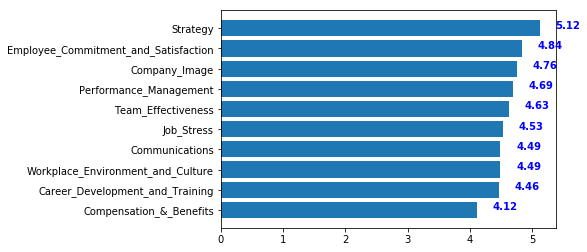

In [125]:
#Horizontal Bar chart
#From: https://pythonspot.com/en/matplotlib-bar-chart/
#Counter()

y_pos = np.arange(len(Topic_Area_Means.response))
#y_pos = np.arange(len(Topic_Area_Means.Area))
plt.barh(y_pos, Topic_Area_Means.response)
plt.yticks(y_pos, Topic_Area_Means.Area)

#Add in numbers to ends of bars
#From: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

for i, v in enumerate(Topic_Area_Means.response):
    plt.text(v + 0.25, i, str(v), color='blue', fontweight='bold')

plt.show()